Accuracy: 0.55
AUC: 0.45
              precision    recall  f1-score   support

    Negative       0.61      0.75      0.67        61
    Positive       0.38      0.23      0.29        39

    accuracy                           0.55       100
   macro avg       0.49      0.49      0.48       100
weighted avg       0.52      0.55      0.52       100

Project successfully created! Check the 'Project_17_Customer_Feedback_Analysis' folder.


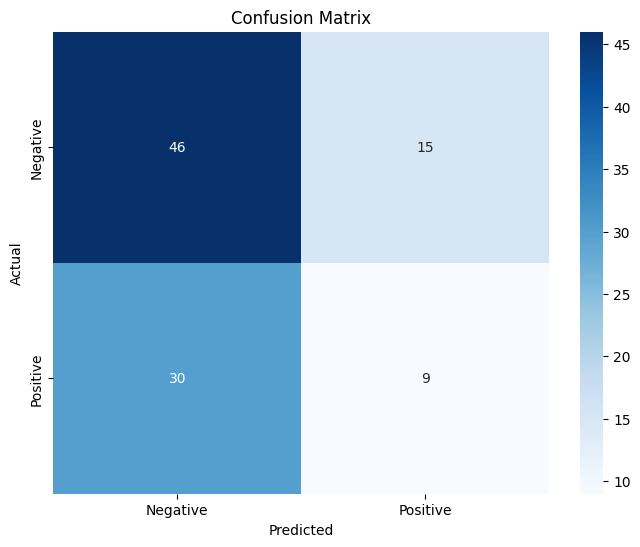

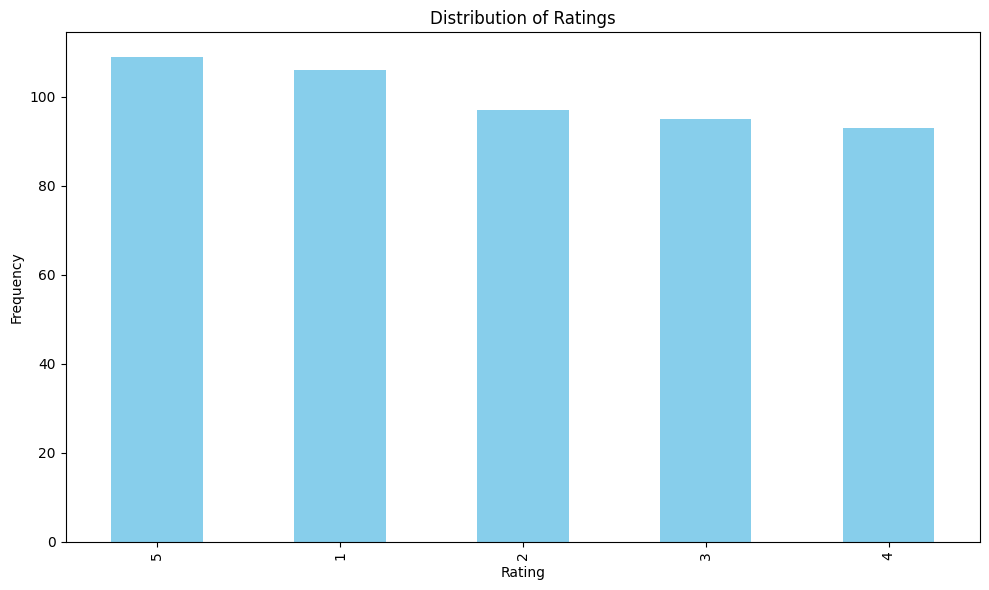

In [1]:
import os
import sys
import subprocess

# Instalar dependências automaticamente
def install_packages():
    """
    Installs the required packages if not already installed.
    """
    packages = ['pandas', 'numpy', 'scikit-learn', 'matplotlib', 'seaborn', 'fpdf', 'nbformat']
    for package in packages:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install_packages()

# Importar as bibliotecas após a instalação
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
import nbformat as nbf
import pickle

# Step 1: Set up project directories
base_dir = 'Project_17_Customer_Feedback_Analysis'
subdirs = ['data', 'notebooks', 'models', 'reports']
for subdir in subdirs:
    os.makedirs(os.path.join(base_dir, subdir), exist_ok=True)

# Step 2: Simulate dataset
np.random.seed(42)
feedback_data = pd.DataFrame({
    'Customer_ID': np.arange(1, 501),
    'Product_ID': np.random.choice(np.arange(1, 21), 500),
    'Rating': np.random.randint(1, 6, 500),
    'Comment': np.random.choice([
        "Great product!", "Not satisfied with the quality.", "Excellent service!",
        "Could be better.", "Loved it!", "Terrible experience.", "Decent but overpriced.",
        "Fast shipping, bad packaging.", "Amazing value for the price!", "Not worth it.",
        "Will buy again!", "Product arrived damaged.", "Customer service was very helpful.",
        "Item not as described.", "Highly recommend!", "Poor quality.", "Good but not great.",
        "Fantastic product, will recommend to others.", "Arrived late.", "Exceeded expectations!"
    ], 500),
    'Support_Interaction': np.random.choice([
        "Resolved quickly", "Issue not resolved", "Long wait time", "Helpful staff", "Unresolved"
    ], 500)
})

feedback_data.to_csv(f'{base_dir}/data/feedback_data.csv', index=False)

# Step 3: Define functions
def load_data(file_path):
    """
    Load the dataset from the specified file path.
    """
    return pd.read_csv(file_path)

def preprocess_data(df):
    """
    Preprocess the data:
    - Convert comments to TF-IDF vectors
    - Create binary labels for sentiment
    """
    tfidf = TfidfVectorizer(max_features=100)
    X = tfidf.fit_transform(df['Comment'])
    y = np.where(df['Rating'] > 3, 1, 0)
    return X, y, tfidf

def train_model(X_train, y_train):
    """
    Train a logistic regression model on the training data.
    """
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model using accuracy, AUC, and confusion matrix.
    """
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"Accuracy: {acc:.2f}")
    print(f"AUC: {auc:.2f}")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig(f'{base_dir}/reports/confusion_matrix.png')

    return acc, auc

# Step 4: Load, preprocess, and split data
data = load_data(f'{base_dir}/data/feedback_data.csv')
X, y, tfidf = preprocess_data(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train and evaluate the model
model = train_model(X_train, y_train)
accuracy, auc_score = evaluate_model(model, X_test, y_test)

# Step 6: Save the trained model
with open(f'{base_dir}/models/sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Step 7: Create visualizations
plt.figure(figsize=(10, 6))
data['Rating'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'{base_dir}/reports/rating_distribution.png')

# Step 8: Create Jupyter notebook
nb = nbf.v4.new_notebook()
nb.cells = [
    nbf.v4.new_markdown_cell("# Project 17: Customer Feedback Analysis in E-commerce"),
    nbf.v4.new_code_cell("import pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve\nimport matplotlib.pyplot as plt\nimport seaborn as sns"),
    nbf.v4.new_code_cell("data = pd.read_csv('data/feedback_data.csv')\ndata.head()"),
    nbf.v4.new_code_cell("X, y, tfidf = preprocess_data(data)"),
    nbf.v4.new_code_cell("X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)"),
    nbf.v4.new_code_cell("model = train_model(X_train, y_train)"),
    nbf.v4.new_code_cell("evaluate_model(model, X_test, y_test)")
]
with open(f'{base_dir}/notebooks/Project_17_Analysis.ipynb', 'w') as file:
    nbf.write(nb, file)

# Step 9: Create README.md
readme_content = """
# Project 17: Customer Feedback Analysis in E-commerce

## Description
This project focuses on analyzing customer feedback in an e-commerce store, using sentiment analysis to provide insights for business improvement.

## Objectives
- Preprocess customer comments
- Build and evaluate a sentiment classification model
- Provide actionable insights based on results

## Instructions
1. Run the Python script or Jupyter Notebook.
2. Review visualizations in the 'reports' folder.

## Requirements
- Python 3.x
- pandas, numpy, scikit-learn, matplotlib, seaborn, fpdf, nbformat
"""
with open(f'{base_dir}/README.md', 'w') as f:
    f.write(readme_content)

# Step 10: Generate PDF report
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, "Project 17: Customer Feedback Analysis in E-commerce", ln=True, align='C')
pdf.ln(10)
pdf.multi_cell(0, 10, "1. Introduction:\nAnalyzing customer feedback...")
pdf.ln(10)
pdf.multi_cell(0, 10, "2. Methodology:\nData was collected, cleaned, and preprocessed...")
pdf.ln(10)
pdf.multi_cell(0, 10, f"3. Analysis and Results:\nAccuracy: {accuracy:.2f}, AUC: {auc_score:.2f}...")
pdf.ln(10)
pdf.multi_cell(0, 10, "4. Conclusions and Recommendations:\nThe model suggests that...")
pdf.output(f"{base_dir}/reports/Project_17_Report.pdf")

print("Project successfully created! Check the 'Project_17_Customer_Feedback_Analysis' folder.")


In [2]:
import shutil
from google.colab import files

shutil.make_archive("17", 'zip', ".")

files.download("17.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>